In [1]:
# Importing library

import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm

In [2]:
# Read the database

Housing_Train = pd.read_excel('Housing Data.xlsx',sheet_name='Train set')
Housing_Train

,X1,X2,X3,X4,y,Unnamed: 5
0,2622,1071,1,1,2105,NaN
1,2922,900,2,1,1740,NaN
2,4815,1125,1,1,2020,NaN
3,3546,927,0,1,1710,NaN
4,4323,909,3,0,1663,NaN
...,...,...,...,...,...,...
211,3492,1341,1,0,2748,NaN
212,2862,1035,1,0,2010,NaN
213,3825,945,1,0,1882,NaN
214,3027,954,1,1,1801,NaN


In [3]:
# Read the test data from the database

Housing_Test = pd.read_excel('Housing Data.xlsx',sheet_name='Test set')
Housing_Test

,X1,X2,X3,X4,y
0,4203,1125,0,1,2212
1,2676,963,3,0,1982
2,3165,1170,1,1,2314
3,3471,1053,0,1,2240
4,4461,1080,0,1,2034
...,...,...,...,...,...
89,3534,1008,2,1,1969
90,1938,1125,0,0,2304
91,2673,1008,2,1,1898
92,2631,1017,0,0,2016


In [4]:
# Read the rollout data from the database

Housing_Rollout = pd.read_excel('Housing Data.xlsx',sheet_name='Rollout data')
Housing_Rollout

,X1,X2,X3,X4,y
0,3651,738,1,1,NaN
1,3456,1008,1,1,NaN
2,3636,1170,1,1,NaN
3,2115,1017,2,1,NaN
4,3282,999,0,1,NaN
...,...,...,...,...,...
9095,2580,1269,0,1,NaN
9096,4221,1026,1,1,NaN
9097,4539,1152,1,1,NaN
9098,2940,1017,0,1,NaN


Text(0.5, 1.0, 'X4 – Binary variable indicating a shopping mall')

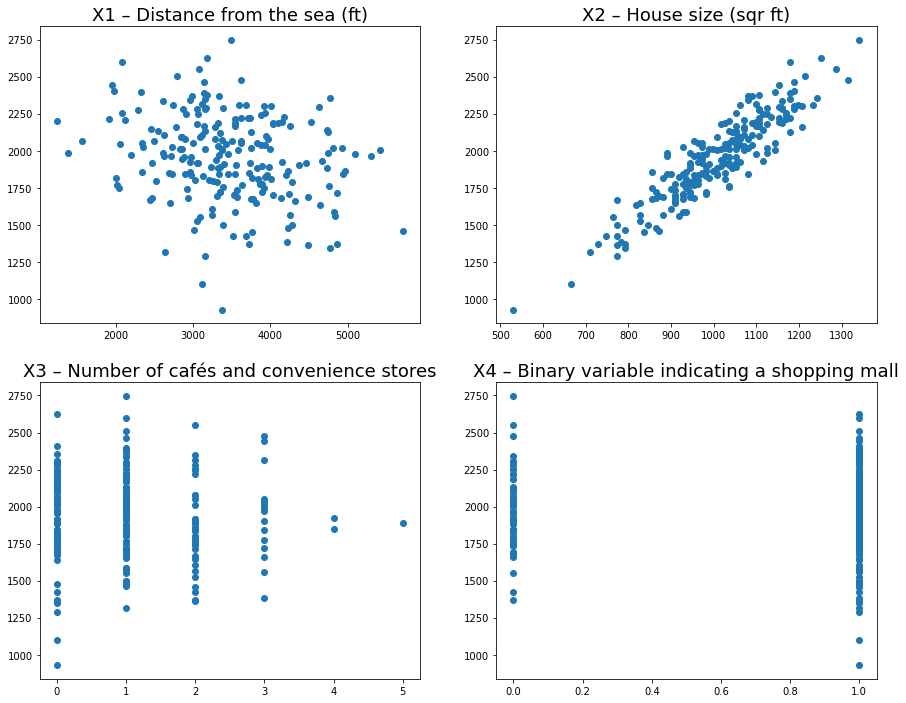

In [5]:
# plotting the graph of X1,X2,X3,X4 based on y variable for training data 

import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))

ax[0][0].scatter(Housing_Train['X1'],Housing_Train['y'])
ax[0,0].set_title('X1 – Distance from the sea (ft)', fontsize=18)

ax[0][1].scatter(Housing_Train['X2'],Housing_Train['y'])
ax[0,1].set_title('X2 – House size (sqr ft)', fontsize=18)

ax[1][0].scatter(Housing_Train['X3'],Housing_Train['y'])
ax[1,0].set_title('X3 – Number of cafés and convenience stores', fontsize=18)

ax[1][1].scatter(Housing_Train['X4'],Housing_Train['y'])
ax[1,1].set_title('X4 – Binary variable indicating a shopping mall', fontsize=18)

### 1. Using a tool of your choice fit a linear regression model using the training data. Keep in mind you will need to make predictions based on this model in later steps.

#### a. A prediction model to predict housing prices (y) using any one of the available variables. (1 Mark)

In [6]:
# Importing library

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
# fit the train data for one variable

est = smf.ols('y ~ X2', Housing_Train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           5.83e-86
Time:                        06:40:33   Log-Likelihood:                -1336.6
No. Observations:                 216   AIC:                             2677.
Df Residuals:                     214   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -195.1544     65.520     -2.979      0.003    -324.302     -66.007
X2             2.1295      0.064     33.027      0.000       2.002       2.257
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.980
Skew:                           0.165   Prob(JB):                        0.372
Kurtosis:                       2.668   Cond. No.                     8.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### b. A prediction model to predict housing prices (y) using variables (X1, X2, and their interaction X1*X2), based on the training set.  (2 Mark)

In [36]:
# fit the data for complex variables

est = smf.ols('y ~ X1*X2', Housing_Train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     562.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.20e-100
Time:                        14:24:52   Log-Likelihood:                -1295.0
No. Observations:                 216   AIC:                             2598.
Df Residuals:                     212   BIC:                             2611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.4652    266.894     -0.384      0.701    -628.572     423.642
X1            -0.0257      0.075     -0.343      0.732      -0.174       0.122
X2             2.3275      0.264      8.825      0.000       1.808       2.847
X1:X2       -5.85e-05   7.41e-05     -0.789      0.431      -0.000    8.77e-05
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.545
Skew:                          -0.011   Prob(JB):                        0.762
Kurtosis:                       2.755   Cond. No.                     1.44e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c. Which of the two models shows better performance over the training set?  (1 Mark)

#### I think so the model second for the training data which is predicting housing prices (y) using variables X1, X2, and their interaction X1*X2 is better than first model.

#### d. What criteria did you use to determine this?  (1 Mark)

#### For the first linear regression model, we are getting 83.6% r-square value swhile for the second linear regression model, we are getting 88.8% r-square value. we have higher r-square value of second model compare to first model, so we can say that second model is better performing to predict the house price. 

### 2. Model Evaluation and Selection

#### a. Apply both of the linear regression models from the previous question on the test set. (2 Marks)

In [69]:
# A prediction model to predict housing prices (y) using any one of the variables from test data.

from sklearn.metrics import mean_squared_error, r2_score

regr = skl_lm.LinearRegression()
y = Housing_Test.y
X2 = Housing_Test.X2.values.reshape(-1,1)   # reshaping data
regr.fit(X2,y)   # fitting the data
Sales_pred = regr.predict(X2)    # predict y value based on X2
r2_score(Sales_pred,y)    # getting r-square value

0.8096096318423697

In [71]:
# A prediction model to predict housing prices (y) using variables (X1, X2, and their interaction X1*X2), based on the test data 

regr = skl_lm.LinearRegression()
X1 = Housing_Test.X1
X2 = Housing_Test.X2.values.reshape(-1,1)
regr.fit(X2,X1)
y_pred = regr.predict(X2) 
r2_score(Sales_pred,X2)

-13.5407764957073

#### b. Which of the two models shows better performance over the test set (name the criteria you used to determine this)? (1 Mark)

#### I think so the model first for the test data which is predicting housing prices (y) using variable X2 is better than second model.Beacuse for the first linear regression model, we are getting 80.9% r-square value while for the second linear regression model, we are getting r-square value in negative (minus). r-square is not always the square of anything, so it can have a negative value. so we can say that, first regression model is performing better performance than second regression model.

### 3. The real estate company downloaded data for approximately 9,100 apartments that are advertised online and are located in the same region. All these records appear in the "rollout" tab in the attached Excel sheet, but do not include the price. Apply the model you selected in the last question and use it to predict the price for all of the apartments whose details appear in the “rollout" tab. (2 Marks)

In [60]:
from sklearn.linear_model import LinearRegression
regr = skl_lm.LinearRegression()
X1 = Housing_Rollout.X1
X2 = Housing_Rollout.X2.values.reshape(-1,1)
regr.fit(X2,X1)
y_pred = regr.predict(X2) 
print('predicted response:', y_pred)

predicted response: [3348.26707017 3367.20159538 3378.56231051 ... 3377.30000883 3367.83274622
 3353.3162769 ]


#### I am using first model to predict the price  for all of the apartments. So I am predicting y vaule based on X2. Our y value column for Rollout sheet from Housing data have none values,So i am not able to fit y value in our regression model . For that reason, I am using X1,X2 value to fit in regression model and predicting y value based on X2. 